In [1]:
# install the important modules
!pip install pandas    
!pip install matplotlib    


In [2]:
# import these modules
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load the data into the dataframe from a csv file
df = pd.read_csv('covid_trade_data.csv')
df.head()

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,Exports,2015,01/01/2015,Thursday,All,All,All,$,104000000,104000000
1,Exports,2015,02/01/2015,Friday,All,All,All,$,96000000,200000000
2,Exports,2015,03/01/2015,Saturday,All,All,All,$,61000000,262000000
3,Exports,2015,04/01/2015,Sunday,All,All,All,$,74000000,336000000
4,Exports,2015,05/01/2015,Monday,All,All,All,$,105000000,442000000


### Explore the data

In [4]:
print("Shape of dataframe:", df.shape)

Shape of dataframe: (111438, 10)


In [5]:
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
Direction         object
Year               int64
Date              object
Weekday           object
Country           object
Commodity         object
Transport_Mode    object
Measure           object
Value              int64
Cumulative         int64
dtype: object


In [6]:
print("Number of missing values in each column:")
print(df.isna().sum())

Number of missing values in each column:
Direction         0
Year              0
Date              0
Weekday           0
Country           0
Commodity         0
Transport_Mode    0
Measure           0
Value             0
Cumulative        0
dtype: int64


In [7]:
print("Number of unique values in each column:")
for col in df.columns:
    print(col, ":", df[col].nunique())

Number of unique values in each column:
Direction : 3
Year : 7
Date : 2541
Weekday : 7
Country : 9
Commodity : 9
Transport_Mode : 3
Measure : 2
Value : 608
Cumulative : 27561


### 1). Total presentation of the turnover (value column) per month (in the corresponding units of measurement)

In [8]:

# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Group by month and sum the values
monthly_turnover = df.groupby(pd.Grouper(key='Date', freq='M'))['Value'].sum()
monthly_turnover

Date
2015-01-31    29765357000
2015-02-28    31316267000
2015-03-31    37169485000
2015-04-30    32665483000
2015-05-31    33963877000
                 ...     
2021-08-31    42686040000
2021-09-30    43359969000
2021-10-31    48281505000
2021-11-30    51493153000
2021-12-31    27652220000
Freq: M, Name: Value, Length: 84, dtype: int64

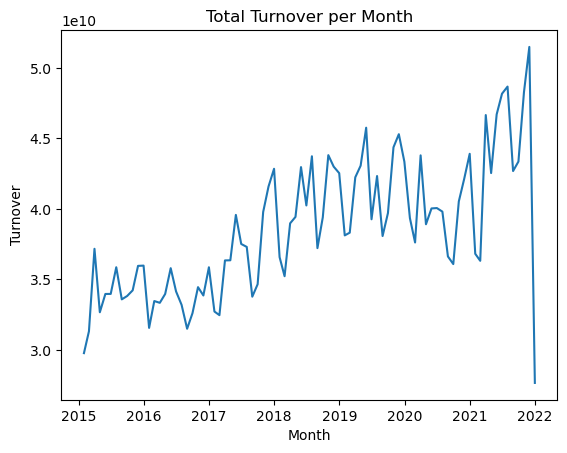

In [9]:
plt.plot(monthly_turnover.index, monthly_turnover.values)
plt.title('Total Turnover per Month')
plt.xlabel('Month')
plt.ylabel('Turnover')
plt.show()

### 2). Total presentation of the turnover (value column) for each country (in the corresponding units of measurement)

In [12]:
# Group by country and sum the values
country_turnover = df.groupby('Country')['Value'].sum()
country_turnover

Country
All                            2315389349000
Australia                       107686000000
China                           282769573000
East Asia (excluding China)     116562137000
European Union (27)              26644000000
Japan                            23155000000
Total (excluding China)         291991000000
United Kingdom                   21591000000
United States                    52321338000
Name: Value, dtype: int64

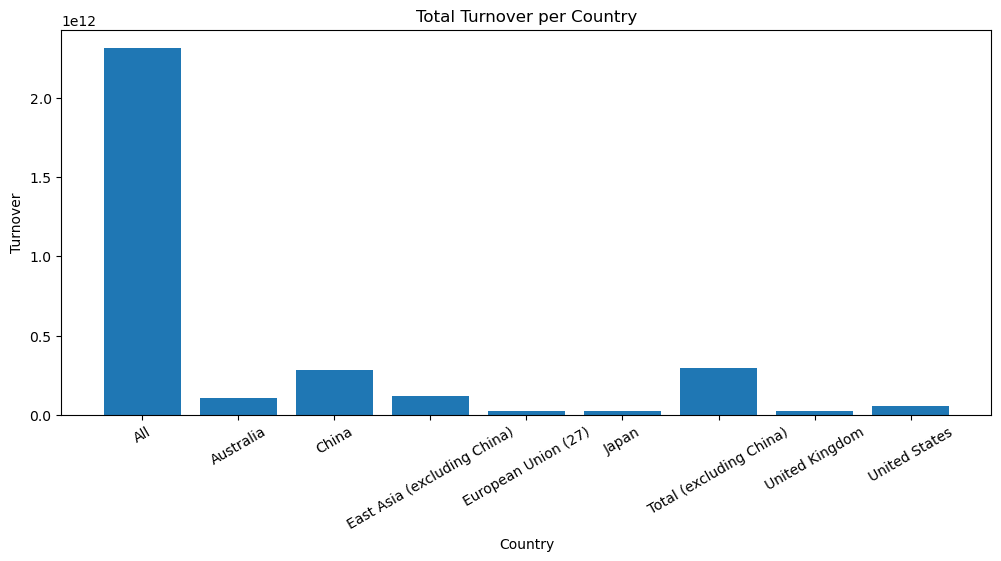

In [14]:
plt.figure(figsize=(12,5))
plt.bar(country_turnover.index, country_turnover.values)
plt.title('Total Turnover per Country')
plt.xlabel('Country')
plt.ylabel('Turnover')
plt.xticks(rotation=30) 
plt.show()

### 3). Overall presentation of the turnover (value column) for each means of transport (in the corresponding units of measurement)

In [15]:
# Group by transport mode and sum the values
transport_turnover = df.groupby('Transport_Mode')['Value'].sum()
transport_turnover

Transport_Mode
Air     132602000000
All    2437107397000
Sea     668400000000
Name: Value, dtype: int64

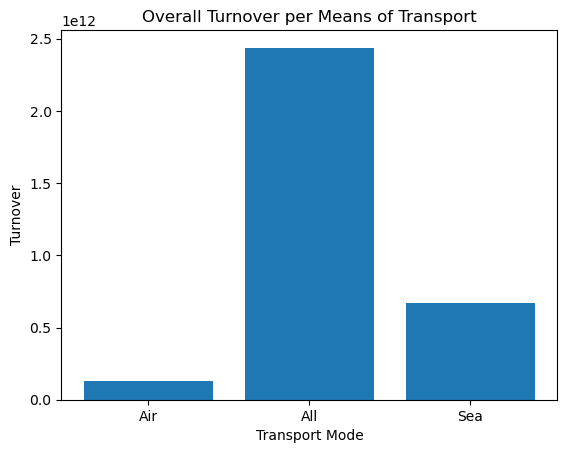

In [14]:
plt.bar(transport_turnover.index, transport_turnover.values)
plt.title('Overall Turnover per Means of Transport')
plt.xlabel('Transport Mode')
plt.ylabel('Turnover')
plt.show()

### 4). Total presentation of the turnover (value column) for each day of the week (in the corresponding units of measurement)

In [16]:
# Group by weekday and sum the values
weekday_turnover = df.groupby('Weekday')['Value'].sum()

# Define the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the data by the weekday order
weekday_turnover = weekday_turnover.reindex(weekday_order)
weekday_turnover

Weekday
Monday       566760527000
Tuesday      520511585000
Wednesday    517382998000
Thursday     532329047000
Friday       533137760000
Saturday     258267241000
Sunday       309720239000
Name: Value, dtype: int64

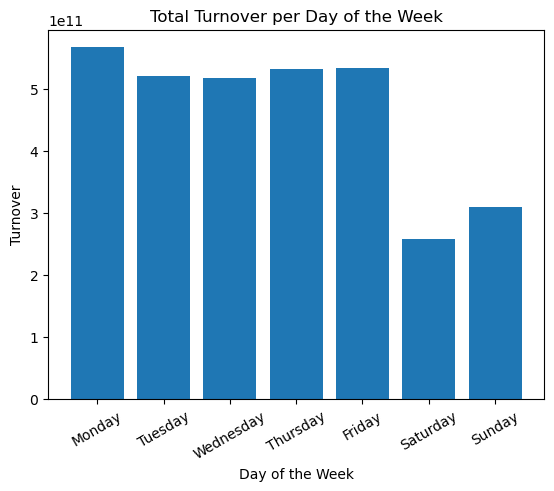

In [17]:
plt.bar(weekday_turnover.index, weekday_turnover.values)
plt.title('Total Turnover per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Turnover')
plt.xticks(rotation=30) 
plt.show()

### 5). Total presentation of turnover (value column) for each category of goods (in the respective units of measurement)

In [19]:
# Group by commodity and sum the values
commodity_turnover = df.groupby('Commodity')['Value'].sum()
commodity_turnover

Commodity
All                                2386667000000
Electrical machinery and equip       51554000000
Fish, crustaceans, and molluscs      15446832000
Fruit                                22197000000
Logs, wood, and wood articles        50645402000
Meat and edible offal                78522372000
Mechanical machinery and equip       72603000000
Milk powder, butter, and cheese     157319791000
Non-food manufactured goods         403154000000
Name: Value, dtype: int64

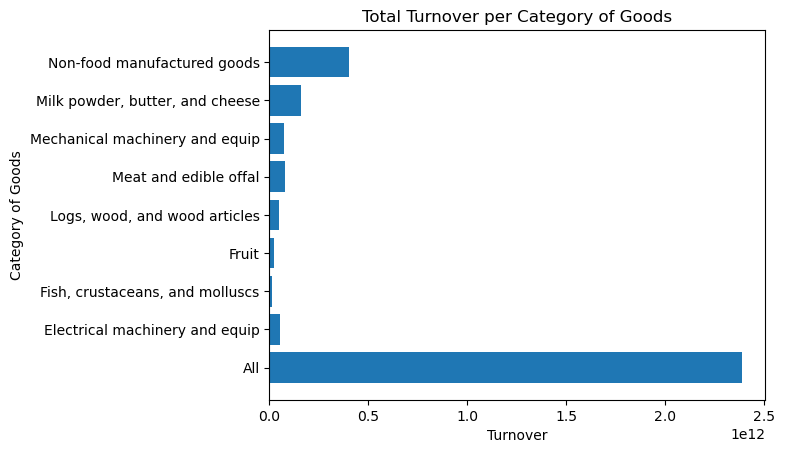

In [20]:
plt.barh(commodity_turnover.index, commodity_turnover.values)
plt.title('Total Turnover per Category of Goods')
plt.ylabel('Category of Goods')
plt.xlabel('Turnover')
plt.show()

### 6). Presentation of the 5 months with the highest turnover, regardless of the means of transport and type of recyclable items

In [21]:
# Group by month and sum the values
# Sort the data by descending order and get the top 5 months
monthly_turnover = df.groupby(pd.Grouper(key='Date', freq='M'))['Value'].sum()
top_months = monthly_turnover.sort_values(ascending=False)[:5]
top_months

Date
2021-11-30    51493153000
2021-07-31    48679012000
2021-10-31    48281505000
2021-06-30    48173793000
2021-05-31    46703805000
Name: Value, dtype: int64

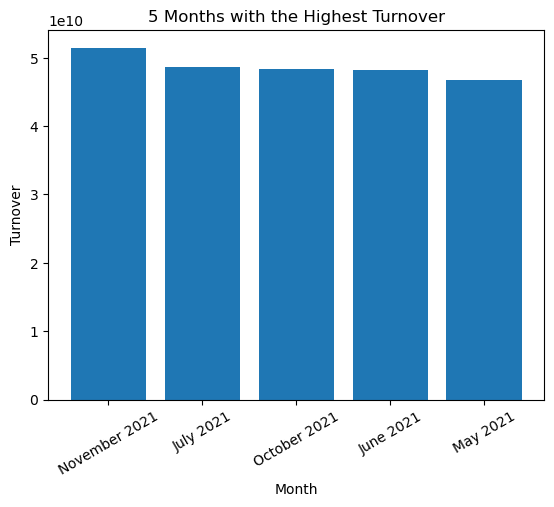

In [24]:
plt.bar(top_months.index.strftime('%B %Y'), top_months.values)
plt.title('5 Months with the Highest Turnover')
plt.xlabel('Month')
plt.ylabel('Turnover')
plt.xticks(rotation=30) 
plt.show()

### 7). Presentation of the 5 categories of goods with the largest turnover, for each country

In [25]:
# Group by country and commodity, and sum the values
country_commodity_turnover = df.groupby(['Country', 'Commodity'])['Value'].sum()
country_commodity_turnover

Country                      Commodity                      
All                          All                                1603472000000
                             Electrical machinery and equip       35076000000
                             Fish, crustaceans, and molluscs      11388832000
                             Fruit                                22197000000
                             Logs, wood, and wood articles        32542650000
                             Meat and edible offal                51212749000
                             Mechanical machinery and equip       57567000000
                             Milk powder, butter, and cheese      98779118000
                             Non-food manufactured goods         403154000000
Australia                    All                                 107686000000
China                        All                                 182406000000
                             Electrical machinery and equip       16478000000
   

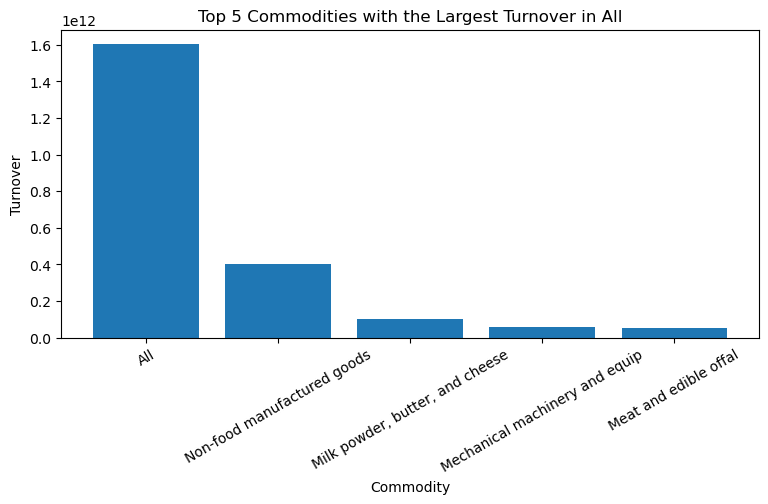

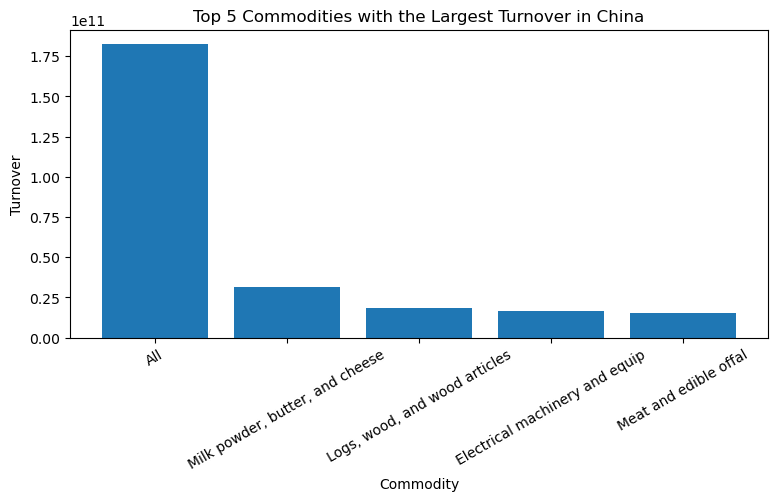

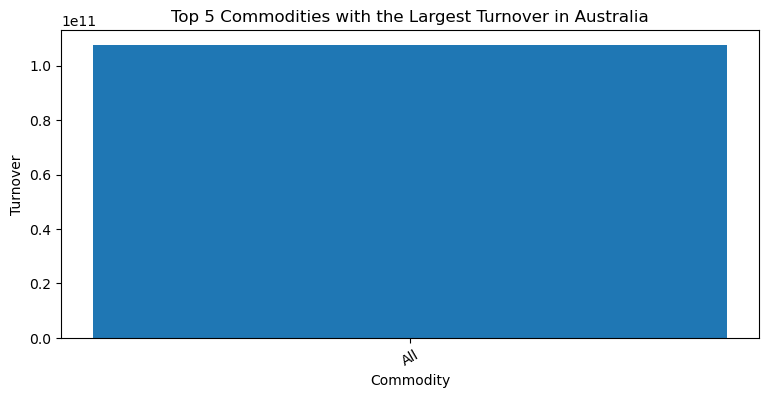

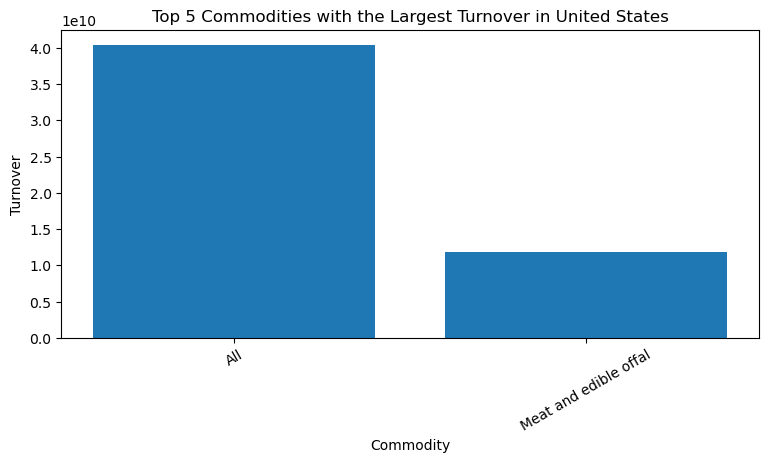

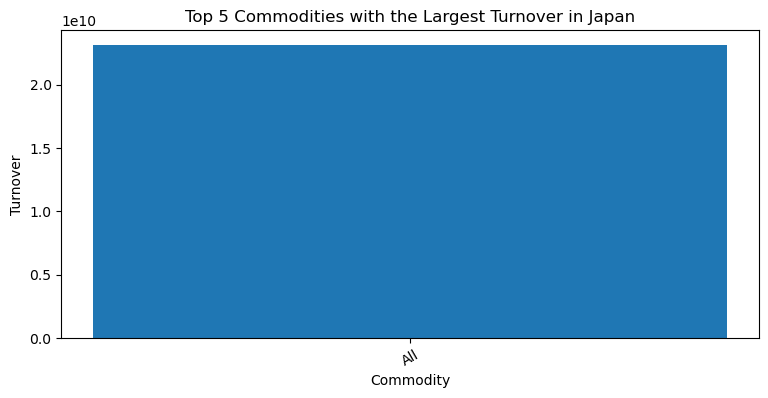

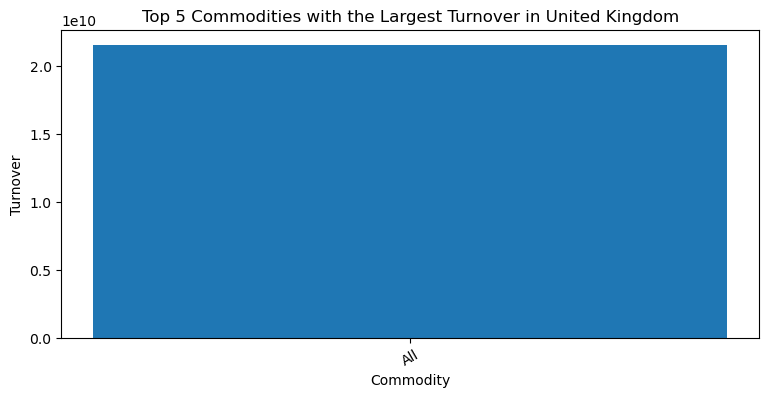

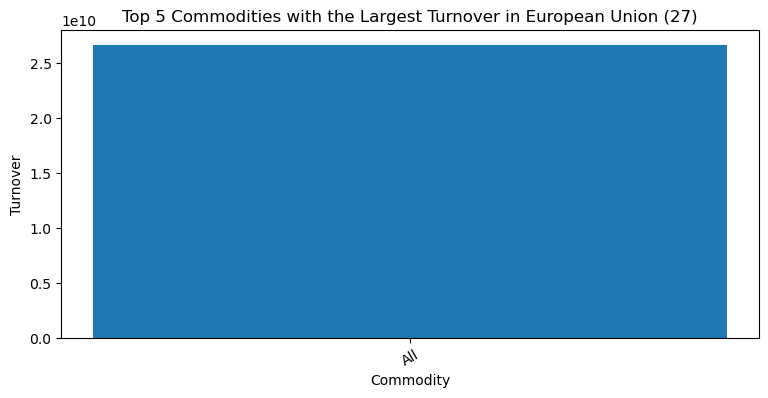

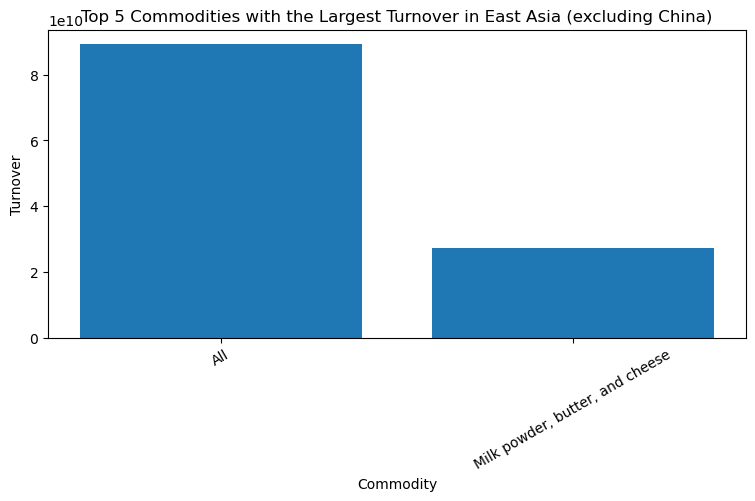

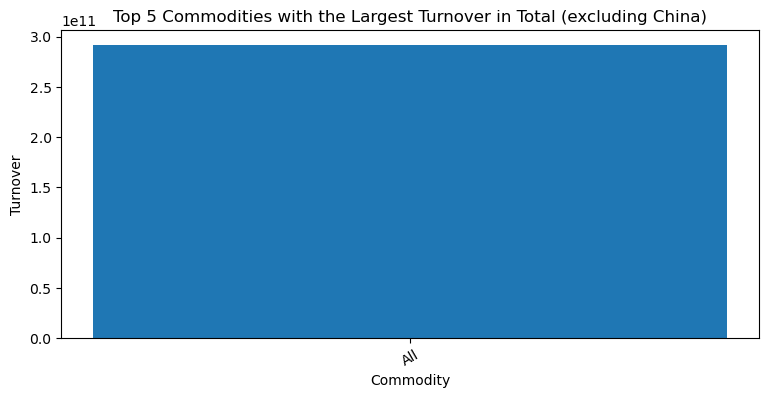

In [26]:
# Loop over the unique countries in the data
for country in df['Country'].unique():
    # Get the top 5 commodities for the current country
    top_commodities = country_commodity_turnover.loc[country].nlargest(5)
    
    # Plot the results for the current country
    plt.figure(figsize=(9,4))
    plt.bar(top_commodities.index, top_commodities.values)
    plt.title(f'Top 5 Commodities with the Largest Turnover in {country}')
    plt.xlabel('Commodity')
    plt.ylabel('Turnover')
    plt.xticks(rotation=30) 
    plt.show()

### 8). Presentation of the day with the highest turnover, for each category of merchandise

In [27]:
# filter out rows where the commodity is "All"
df = df[df['Commodity'] != 'All']

# group the data by commodity
groups = df.groupby('Commodity')

# create an empty dataframe to hold the results
results = pd.DataFrame(columns=['Commodity', 'Day', 'Turnover'])

# loop through each group and find the day with the highest turnover
for name, group in groups:
        by_date = group.groupby('Date')['Value'].sum()
        sorted_by_date = by_date.sort_values(ascending=False)
        highest_day = sorted_by_date.iloc[0]
        total_turnover = group['Value'].sum()
        new_row = pd.DataFrame({'Commodity': [name], 'Day': [sorted_by_date.index[0]], 'Turnover': [total_turnover]})
        results = pd.concat([results, new_row], ignore_index=True)

results

,Commodity,Day,Turnover
0,Electrical machinery and equip,2020-11-06,51554000000
1,"Fish, crustaceans, and molluscs",2017-09-25,15446832000
2,Fruit,2020-05-03,22197000000
3,"Logs, wood, and wood articles",2021-07-30,50645402000
4,Meat and edible offal,2017-05-21,78522372000
5,Mechanical machinery and equip,2018-10-02,72603000000
6,"Milk powder, butter, and cheese",2019-12-04,157319791000
7,Non-food manufactured goods,2020-06-26,403154000000


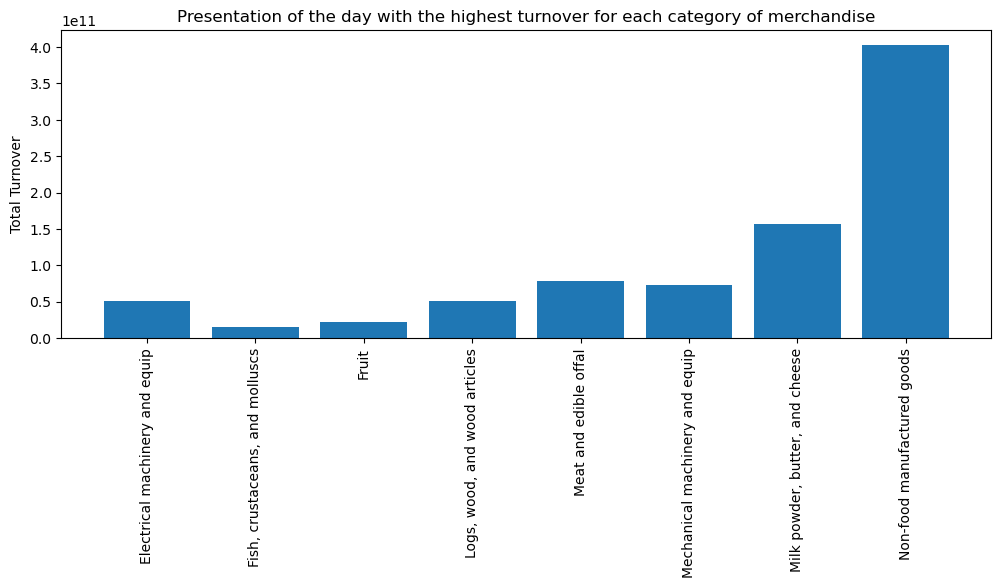

In [29]:
plt.figure(figsize=(12,4))
plt.bar(results['Commodity'], results['Turnover'])
plt.xticks(rotation=90)
plt.ylabel('Total Turnover')
plt.title('Presentation of the day with the highest turnover for each category of merchandise')
plt.show()